#**Dehazing with Pix2Pix on Reside Dataset(trans-clear)**

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2334, done.
remote: Total 2334 (delta 0), reused 0 (delta 0), pack-reused 2334
Receiving objects: 100% (2334/2334), 8.09 MiB | 5.58 MiB/s, done.
Resolving deltas: 100% (1497/1497), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 5.7MB/s 
     |████████████████████████████████| 204kB 18.9MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=d70d7132fad803693bb05ea96dcc4fb59d355928729d7b1a2f3abef65bb33452
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=cab5c94dfa53606cfd1d16a931365a06069a85ec8c8978409d9dd863dec86054
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
!ls /mydrive/Dehazing/
!cp /mydrive/Dehazing/reside_pix2pix_trans.zip ../
!unzip -q ../reside_pix2pix_trans.zip -d dataset/

reside_pix2pix_trans.zip  reside_pix2pix.zip  results.zip


# Training


In [ ]:
!python train.py --dataroot ./dataset/ --name dehazing_pix2pix --model pix2pix --direction AtoB --n_epochs 50 --n_epochs_decay 50

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./dataset/                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing


In [ ]:
!ls checkpoints/

dehazing_pix2pix


In [ ]:
!python test.py --dataroot ./dataset/ --direction AtoB --model pix2pix --name dehazing_pix2pix

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./dataset/                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

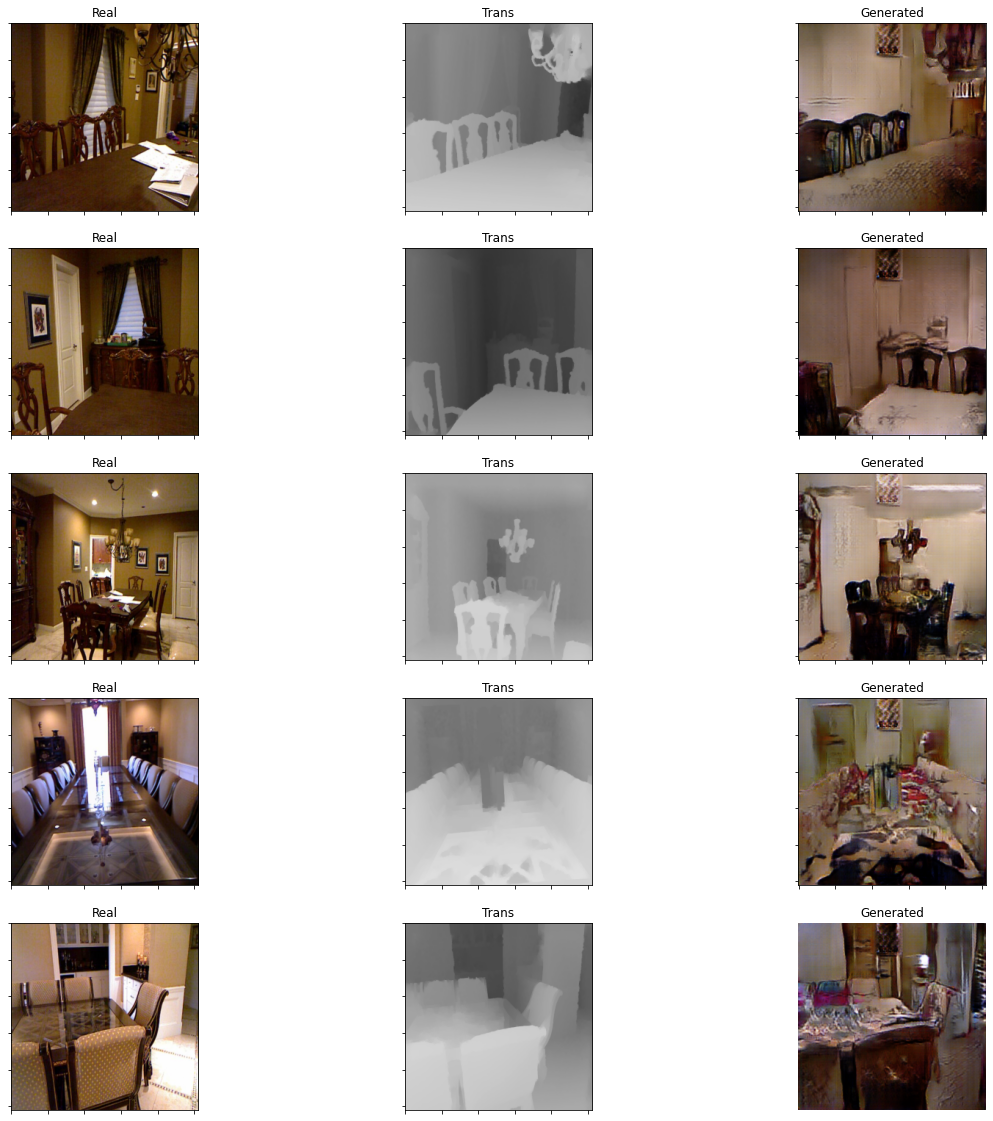

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 5
num=0
p=0
add = ['_real_B.png','_real_A.png','_fake_B.png']
title = ['Real','Trans','Generated']
for i in range(1, columns*rows +1):
    img = plt.imread('./results/dehazing_pix2pix/test_latest/images/00000' + str(num) + add[p])
    a = fig.add_subplot(rows, columns, i)
    a.set_title(title[p])
    a.set_xticklabels([])
    a.set_yticklabels([])
    plt.imshow(img)
    p+=1;
    if(p==3):
      num+=1
      p=0
plt.axis('off')
plt.show()

In [ ]:
!zip -r results.zip ./results/dehazing_pix2pix/test_latest/images/
!cp ./results.zip /mydrive/Dehazing/
from google.colab import files
files.download('results.zip')

  adding: results/dehazing_pix2pix/test_latest/images/ (stored 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000044_fake_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000049_fake_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000037_real_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000047_real_A.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000028_fake_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000047_fake_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000022_real_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000019_real_A.png (stored 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000033_fake_B.png (deflated 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000027_real_A.png (stored 0%)
  adding: results/dehazing_pix2pix/test_latest/images/000026_fake_B.png (defl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>